In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
dataset.shape

(10000, 14)

In [13]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [14]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [15]:
X=pd.concat([X,geography,gender],axis=1)

In [21]:
X=X.drop(['Geography','Gender'],axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Germany          10000 non-null  uint8  
 9   Spain            10000 non-null  uint8  
 10  Male             10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid



In [38]:
def create_model(layers,activation):
    model=Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
    model.add(Dense(units =1, kernel_initializer='glorot_uniform',activation='sigmoid'))
    
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model



In [39]:
model=KerasClassifier(build_fn=create_model,verbose=0)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [40]:
layers=[[20],[40,20],[45,30,15]]
activations=['sigmoid','relu']
param_grid=dict(layers=layers,activation=activations,batch_size=[128,256],epochs=[20,30,40])

In [41]:
grid=GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
grid_result=grid.fit(X_train,y_train)

In [42]:
print(grid_result.best_score_,grid_result.best_params_)

0.8597500085830688 {'activation': 'relu', 'batch_size': 128, 'epochs': 40, 'layers': [45, 30, 15]}


In [59]:
#initializing the ANN
classifier=Sequential()


In [60]:
# Adding the input layer and first hidden layer
classifier.add(Dense(units=45,kernel_initializer='he_uniform',activation='relu',input_dim=11))

#add second hidden layers
classifier.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu'))

#add third hidden layers
classifier.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))

#add the output layers
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#fitting the ANN to the training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=12,epochs=40)

Epoch 1/40
447/447 [==============================] - 2s 3ms/step - loss: 0.4793 - accuracy: 0.8007 - val_loss: 0.4252 - val_accuracy: 0.8194
Epoch 2/40
447/447 [==============================] - 1s 2ms/step - loss: 0.3826 - accuracy: 0.8406 - val_loss: 0.3884 - val_accuracy: 0.8368
Epoch 3/40
447/447 [==============================] - 1s 3ms/step - loss: 0.3590 - accuracy: 0.8567 - val_loss: 0.3792 - val_accuracy: 0.8406
Epoch 4/40
447/447 [==============================] - 1s 3ms/step - loss: 0.3446 - accuracy: 0.8576 - val_loss: 0.3779 - val_accuracy: 0.8482
Epoch 5/40
447/447 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8638 - val_loss: 0.3722 - val_accuracy: 0.8493
Epoch 6/40
447/447 [==============================] - 1s 2ms/step - loss: 0.3313 - accuracy: 0.8610 - val_loss: 0.3704 - val_accuracy: 0.8497
Epoch 7/40
447/447 [==============================] - 1s 2ms/step - loss: 0.3257 - accuracy: 0.8658 - val_loss: 0.3660 - val_accuracy: 0.8535
Epoch 

In [61]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


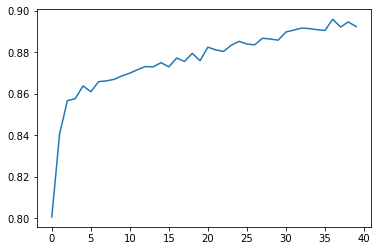

In [62]:
plt.plot(model_history.history['accuracy'])

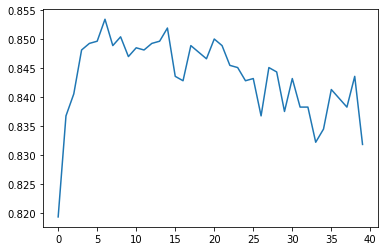

In [63]:
plt.plot(model_history.history['val_accuracy'])

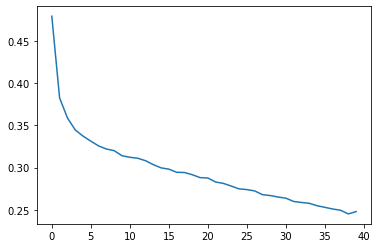

In [64]:
plt.plot(model_history.history['loss'])

In [69]:
pred_y=grid.predict(X_test)
y_pred=(pred_y>0.5)

from sklearn.metrics import confusion_matrix,accuracy_score

In [70]:
cm= confusion_matrix(y_test,y_pred)
cm

array([[1538,   57],
       [ 211,  194]], dtype=int64)

In [71]:
score=accuracy_score(y_pred,y_test)
score

0.866